### Data Edit 

In [25]:
import pandas as pd

red=pd.read_csv("./data/winequality-red.csv")
red=pd.DataFrame(red)

white=pd.read_csv("./data/winequality-white.csv", sep=";")
white=pd.DataFrame(white)

red['type']=0
white["type"]=1

wines = red.append(white, ignore_index = True)

In [26]:
X=wines.iloc[:, 0:12]
Y=wines.iloc[:,12:13]

### Train - Test Split

In [27]:
from sklearn.model_selection import train_test_split 

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=0.33, random_state=42)

### Create Model

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model=Sequential()
model.add(Dense(64, input_shape=(12,)))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))


In [29]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                832       
_________________________________________________________________
activation_6 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
activation_7 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
_________________________________________________________________
activation_8 (Activation)    (None, 1)                 0         
Total params: 5,057
Trainable params: 5,057
Non-trainable params: 0
____________________________________________________

### Model Compile

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=["accuracy"])

### Model Fit

In [31]:
epochs=10
batch_size=64
hist=model.fit(x_train, y_train, 
               epochs=epochs, 
               batch_size=batch_size,
               verbose=1)

Epoch 1/10
68/68 [==============================] - 0s 2ms/step - loss: 0.9379 - accuracy: 0.8318
Epoch 2/10
68/68 [==============================] - 0s 2ms/step - loss: 0.2178 - accuracy: 0.9292
Epoch 3/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1905 - accuracy: 0.9364
Epoch 4/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1590 - accuracy: 0.9460
Epoch 5/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9515
Epoch 6/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.9554
Epoch 7/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1216 - accuracy: 0.9570
Epoch 8/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1192 - accuracy: 0.9593
Epoch 9/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1076 - accuracy: 0.9637
Epoch 10/10
68/68 [==============================] - 0s 2ms/step - loss: 0.1067 - accuracy: 0.9623


### Model Predict

In [ ]:
import numpy as np

fixed_acidity=float(input("fixed acidity: "))
volatile_acidity=float(input("volatile acidity: "))
citric_acid=float(input("citric acid: "))
residual_sugar=float(input("residual sugar: "))
chlorides=float(input("chlorides: "))
free_sulfur_dioxide=float(input("free sulfur dioxide: "))
total_sulfur_dioxide=float(input("total sulfur dioxide: "))
density=float(input("density: "))
pH=float(input("pH: "))
sulphates=float(input("sulphates: "))
alcohol=float(input("alcohol: "))
quality=float(input("quality: "))


prediction=np.array([fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide, density, pH, sulphates, alcohol,quality]).reshape(1,12)
result=model.predict_classes(prediction)

if result==0:
  print("Red Wine")
elif result==1:
  print("White Wine")

In [39]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print("\nTest score:", score[0])
print('Test accuracy:', score[1])

34/34 [==============================] - 0s 1ms/step - loss: 0.1525 - accuracy: 0.9483

Test score: 0.15250541269779205
Test accuracy: 0.9482517242431641


### Model Visualization

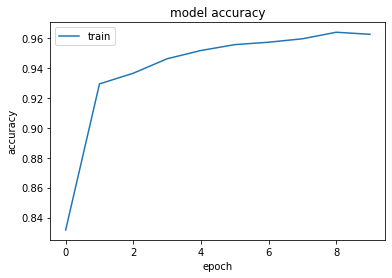

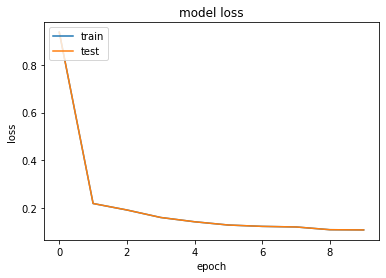

In [40]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('wine_accuracy.png')
plt.show()
 
plt.plot(hist.history['loss'])
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('wine_loss.png')
plt.show()